In [1]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# move to the target folder nad listing the content
%cd /content/drive/MyDrive/Machine_Learning/
!ls

/content/drive/MyDrive/Machine_Learning
1_image_facial_recognition_basic.ipynb
2_live_webcam_facial_landmarks_CNN.ipynb
3_live_webcam_facial_landmarks_drowsiness_detection_DlibCNN.ipynb
3_live_webcam_facial_landmarks_drowsiness_detection_MTCNN.ipynb
4_image_facial_analysis_recognition_DeepFace.ipynb
image_facial_emotion_recognition_MTCNN.ipynb
Images
Models
sound


In [3]:
# Install DeepFace
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 10.2 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=11e409327711b60213b6278eb8ada35fba6e674bcba2d366e82a4a2b40285d8c
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [152]:
# importing the modules
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from google.colab.patches import cv2_imshow
from deepface import DeepFace
from PIL import Image
import cv2


In [149]:
# Google funcion to capture a photo from the webcam
def take_photo(filename='Images/photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
  ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [181]:
# verify if the images correspond is the same person
# default model: VGG-Face
# others models: Facenet, OpenFace, DeepFace
# distance_metric: cosine, euclidean, euclidean_l2
def verify(filename1, filename2, model_name, distance_metric):

  # read the images
  image1 = cv2.imread(filename1)
  image2 = cv2.imread(filename2)

  # show the images
  cv2_imshow(image1)
  cv2_imshow(image2)

  detector = DeepFace.verify(image1, image2, model_name=model_name, distance_metric=distance_metric)

  verification = detector['verified']

  if verification:
     print('They are same')
  else:
     print('They are not same')

In [176]:
# function to recognize the face emotion in the image
def predict(filename, analysis_type='emotion'):
  # read the image
  image = cv2.imread(filename)

  # define the detector
  detector = DeepFace.analyze(img_path = filename, actions = ['age', 'gender', 'race', 'emotion'])

  for result in detector:
    # get coordinates from face
    x = result['region']['x']
    y = result['region']['y']
    w = result['region']['w']
    h = result['region']['h']

    # create the face bounding box
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    match analysis_type:
      case "age":
          typeResult = str(result["age"]) + " years old"
      case "race":
          typeResult = result["dominant_race"]
      case "emotion":
          typeResult = result["dominant_emotion"]
      case "gender":
          typeResult = result["dominant_gender"]
      case _:
          typeResult = result["dominant_emotion"]

    text = '{}'.format(typeResult)

    cv2.putText(image, text, (x+20, y-20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

  cv2_imshow(image)

Action: emotion: 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]


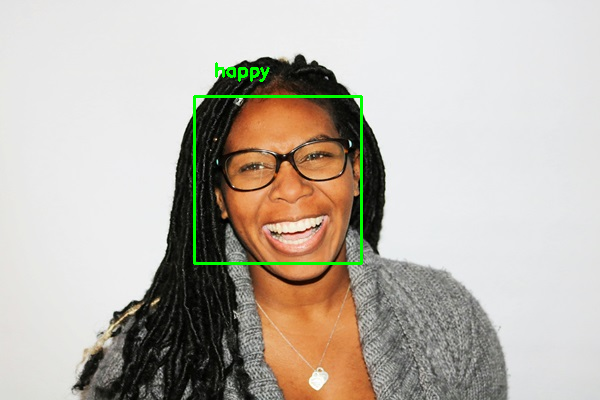

In [180]:
image_file = './Images/faces6.jpg'
predict(image_file, 'emotion')

Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.34it/s]


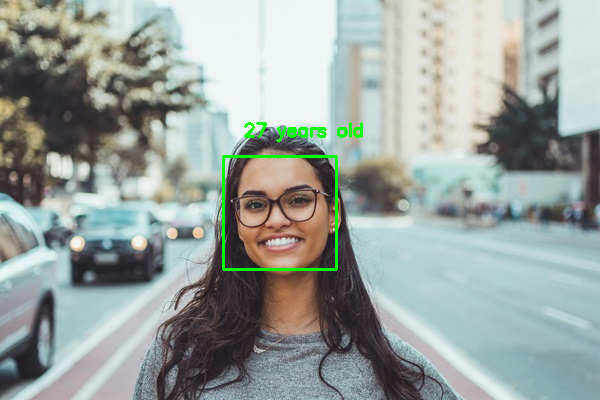

In [177]:
image_file = './Images/faces5.jpg'
predict(image_file, 'age')

Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.90it/s]


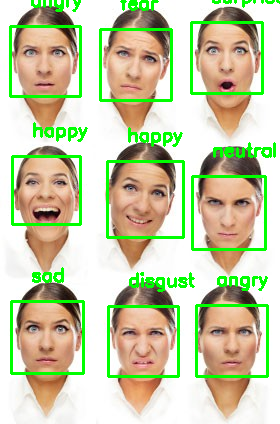

In [147]:
image_file = './Images/emotion_faces_3.jpg'
predict(image_file)

Action: emotion: 100%|██████████| 4/4 [00:03<00:00,  1.17it/s]


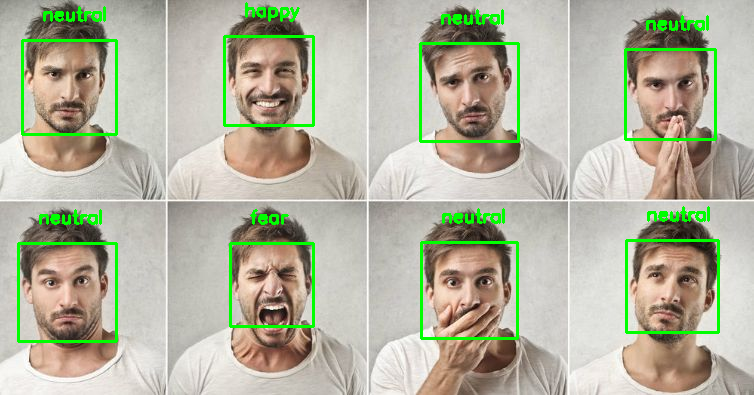

In [139]:
image_file = './Images/emotion_faces_4.jpg'
predict(image_file)

<IPython.core.display.Javascript object>

Action: emotion: 100%|██████████| 4/4 [00:02<00:00,  1.68it/s]


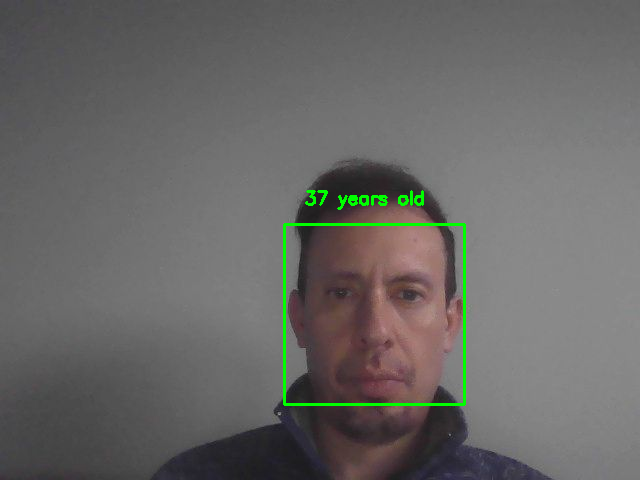

In [178]:
image_photo = take_photo()
predict(image_photo, 'age')

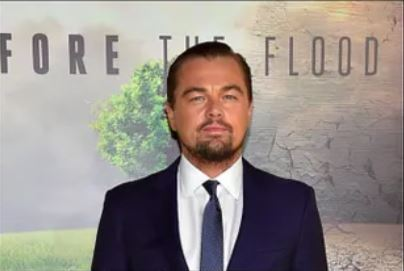

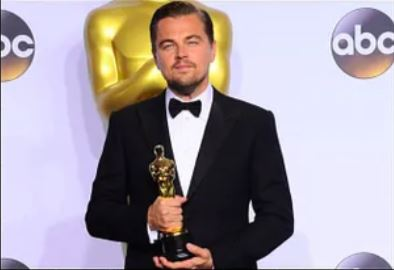

They are same


In [163]:
verify('./Images/faces3.jpg', './Images/faces4.jpg', model_name='Facenet', distance_metric='cosine')

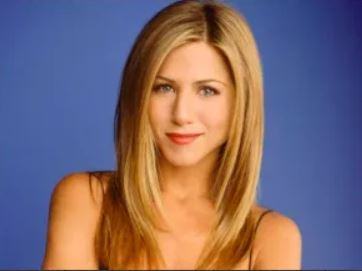

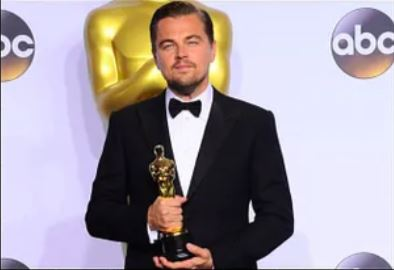

The are not same


In [164]:
verify('./Images/faces2.jpg', './Images/faces4.jpg', model_name='Facenet', distance_metric = 'euclidean_l2')